# Statistical analysis between coastal and adjacent ocean cells in around Tasmania

## Importing packages

In [1]:
from datetime import date 
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.ndimage as ndimage
from scipy.ndimage import convolve
from scipy.ndimage.measurements import label, find_objects
import xarray as xr

## Opening the mask file

In [2]:
ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/static_era5.nc').sel(longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
mask = xr.where(ds.lsm==0, 0, 1)
mask

<xarray.DataArray 'lsm' (time: 1, latitude: 21, longitude: 21)>
array([[[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])
Coordinates:
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * time       (time) datetime64[ns] 2000-01-01

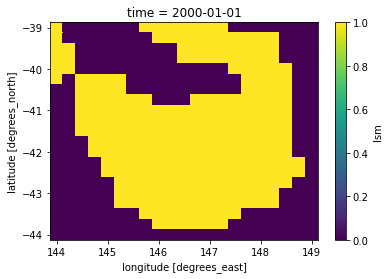

In [3]:
mask.plot()

## Finding coastal cells
Using scipy.ndimage convolve

k is an array of weights, with the same number of dimensions as input

In [4]:
k =([[[1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]]])

input array 'mask' is convolved with 'k', mode='constant' which ensures that the input is extended by filling all values beyond the edge with the same constant value

In [5]:
c = convolve(mask, k, mode='constant')

In [6]:
c

array([[[1, 2, 0, 0, 0, 0, 1, 2, 4, 5, 5, 5, 5, 4, 4, 3, 3, 2, 1, 0, 0],
        [3, 4, 1, 0, 0, 0, 1, 3, 4, 6, 7, 8, 8, 7, 6, 5, 5, 3, 2, 0, 0],
        [4, 4, 2, 0, 0, 0, 0, 1, 2, 5, 6, 8, 8, 8, 8, 8, 8, 5, 3, 0, 0],
        [5, 5, 3, 0, 0, 0, 0, 0, 0, 2, 3, 5, 5, 6, 7, 8, 8, 6, 4, 1, 0],
        [4, 5, 4, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 4, 5, 7, 8, 7, 4, 2, 0],
        [2, 5, 4, 5, 5, 3, 2, 0, 0, 0, 0, 0, 0, 1, 4, 6, 8, 8, 5, 3, 0],
        [1, 4, 5, 8, 8, 6, 5, 2, 1, 0, 1, 2, 3, 3, 5, 6, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 7, 6, 4, 4, 3, 4, 4, 5, 5, 6, 7, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 7, 6, 5, 6, 7, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 1],
        [0, 0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

coastal array is 1 when the mask==1 and the sum of neighbouring cells is < 8 (which means at least one cell is neighbouring a 0 (or sea grid cell)

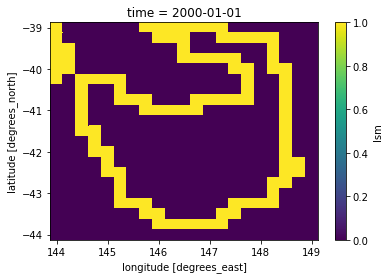

In [7]:
coastal = np.logical_and(mask == 1, c < 8)
coastal.astype(int).plot()

In [8]:
def fix(ds):
    # This function makes the original data array repeatable so that it matches with the shape of the other data array.

    trial = ds
    i = 0
    while i < 1096:  # <-- Here, 1096 corresponds to the timesteps in land dataset 
        trial = xr.concat([trial, ds], 'time')
        i+=1
    trial = trial.isel(time = slice(0,1096))
    # to specify the dates/time 
    trial.coords['time'] = np.arange(date(2016,1,1).toordinal(),date(2018,12,31).toordinal()+1) 
    
    t = np.arange(date(2016,1,1).toordinal(),date(2018,12,31).toordinal()+1)
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    
    trial.coords['time'] = dates

    return trial

In [9]:
new_coastal = fix(coastal)  # new_coastal will now have the same shape as anom 

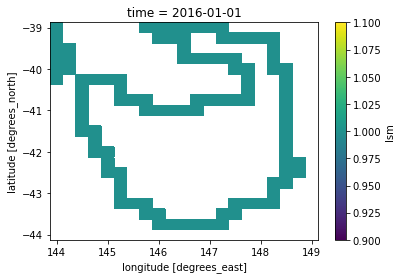

In [10]:
coast_grids = new_coastal.where(new_coastal != 0)
coast_grids
coast_grids.isel(time=0).plot()

In [11]:
coast_sel_stacked = coast_grids.stack(latlon=('latitude', 'longitude')).dropna(dim='latlon')
# this stacks all lat, lon pairs corresponding to the coastal cells 

In [12]:
coast_sel_stacked

<xarray.DataArray 'lsm' (time: 1096, latlon: 102)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * time       (time) object 2016-01-01 2016-01-02 ... 2018-12-30 2018-12-31
  * latlon     (latlon) MultiIndex
  - latitude   (latlon) float64 -39.0 -39.0 -39.0 -39.0 ... -43.75 -43.75 -43.75
  - longitude  (latlon) float64 144.0 145.8 146.0 146.2 ... 146.8 147.0 147.2

## Anomaly datasets

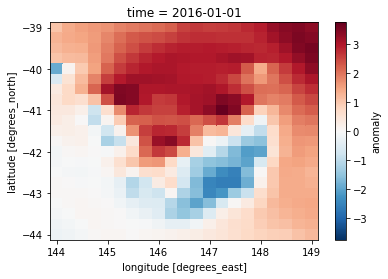

In [13]:
# surface air temperature anomalies
tasa = xr.open_dataset('/g/data/e14/cp3790/Charuni/surface_air_temp_anomaly.nc').sel(time=slice('2016', '2018'), longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
anom = tasa.anomaly
anom.isel(time=0).plot()

In [14]:
# sea surface temperature anomalies 
files = sorted(glob.glob('/g/data/e14/cp3790/Charuni/MHW-sev/mhw_severity.pc90.*.nc'))
mhw = xr.open_mfdataset(files, combine='by_coords').sel(time=slice('2016', '2018'), lon=slice(144.0, 149.0), lat=slice(-44.0, -39.0))

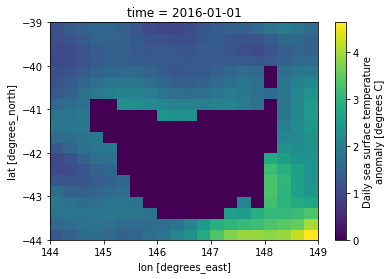

In [15]:
ssta = mhw.ssta
ssta.isel(time=0).plot()

Using the stacked latlon locations of coastal cells to find the location of the neighbouring cells in the ssta dataset, which I now call 'localcells'

In [16]:
# the ssta dataset has a resolution of 0.25 degrees; plus/minus 0.3 ensures that the selections overlaps, accounting for
# any shift between the two grids 

for (lat, lon) in coast_sel_stacked.latlon.values:
    centre = ssta.sel(lat=lat, lon=lon, method='nearest')
    centre_lat = centre.lat.values
    centre_lon = centre.lon.values
    localcells = ssta.sel(lat=slice(centre_lat-0.3,centre_lat+0.3), lon=slice(centre_lon-0.3,centre_lon+0.3))
   

In [17]:
localcells

<xarray.DataArray 'ssta' (time: 1096, lat: 3, lon: 3)>
dask.array<getitem, shape=(1096, 3, 3), dtype=float32, chunksize=(1096, 3, 3), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2018-12-31
  * lat      (lat) float64 -43.88 -43.62 -43.38
  * lon      (lon) float64 147.1 147.4 147.6
Attributes:
    units:      degrees C
    long_name:  Daily sea surface temperature anomaly

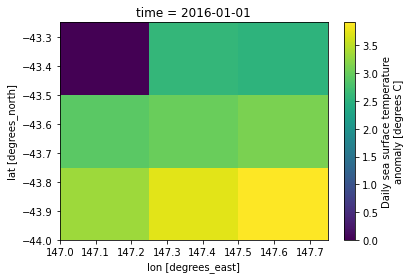

In [18]:
localcells.isel(time=0).plot()

Using the stacked latlon locations of coastal cells to find the location of the corresponding cells in the (land) anom dataset, which I now call 'landcells'

In [19]:
for (lat, lon) in coast_sel_stacked.latlon.values:
    centre = tasa.sel(latitude=lat, longitude=lon, method='nearest')
    centre_lat = centre.latitude.values
    centre_lon = centre.longitude.values
    landcells = anom.sel(latitude=centre_lat, longitude=centre_lon)
    

In [20]:
landcells

<xarray.DataArray 'anomaly' (time: 1096)>
array([0.446252, 0.26779 , 1.311528, ..., 0.605232, 1.60314 , 2.046251],
      dtype=float32)
Coordinates:
    longitude  float32 147.25
    latitude   float32 -43.75
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2018-12-31

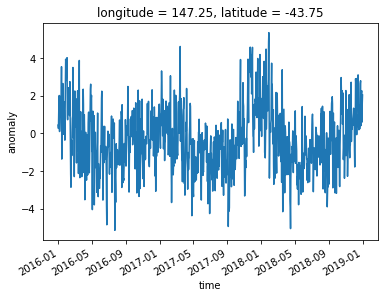

In [21]:
landcells.plot()

In [22]:
for (lat, lon) in coast_sel_stacked.latlon.values:
    cen = anom.sel(latitude=lat, longitude=lon, method='nearest')
    centre = ssta.sel(lat=lat, lon=lon, method='nearest')
    cen_lat = cen.latitude.values
    centre_lat = centre.lat.values
    cen_lon = cen.longitude.values
    centre_lon = centre.lon.values
    landcells = anom.sel(latitude=cen_lat, longitude=cen_lon)
    localcells = ssta.sel(lat=slice(centre_lat-0.3,centre_lat+0.3), lon=slice(centre_lon-0.3,centre_lon+0.3))

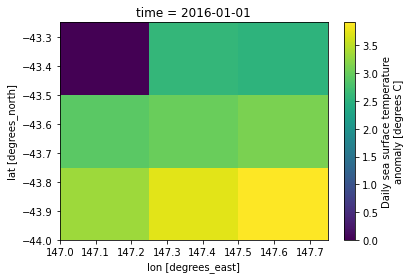

In [23]:
localcells.isel(time=0).plot()

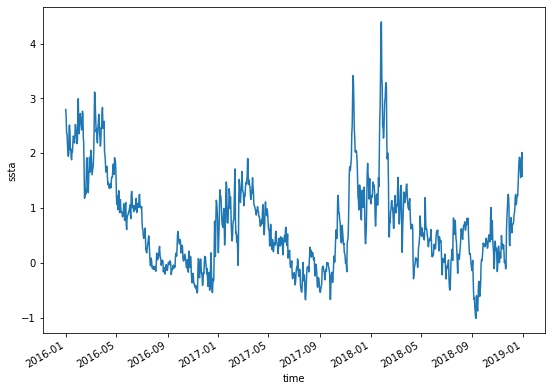

In [24]:
localcells.mean(dim=('lat','lon')).plot(size=6)

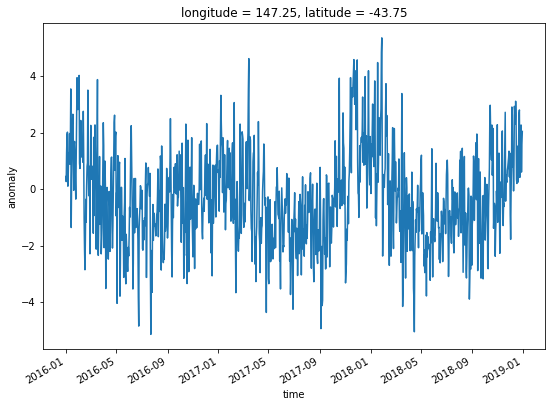

In [26]:
landcells.plot(size=6)

## Plotting time series of surface air temperature and sea surface temperature anomalies

For a given coastal cell and its neighbouring ocean cells

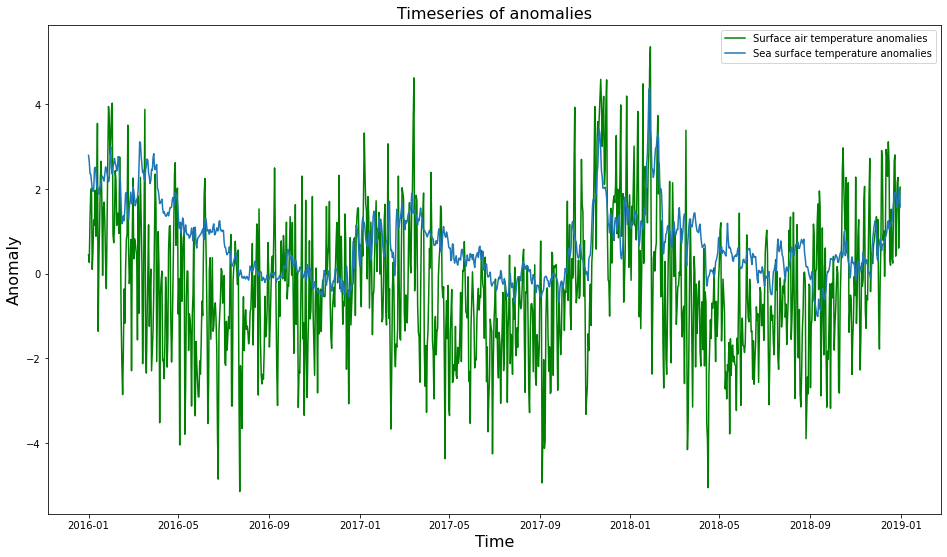

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))  
plt.plot(landcells.time, landcells, color='green', label='Surface air temperature anomalies')
plt.plot(localcells.time, localcells.mean(dim=('lat','lon')), label='Sea surface temperature anomalies')
plt.xlabel('Time',fontsize=16)
plt.ylabel('Anomaly', fontsize=16)
plt.title('Timeseries of anomalies', fontsize=16)
plt.legend()
#L=plt.legend()
#L.get_texts()[0].set_text('tasa')

In [28]:
for (lat, lon) in coast_sel_stacked.latlon.values:
    cen = anom.sel(latitude=lat, longitude=lon, method='nearest')
    cen_lat = cen.latitude.values
    cen_lon = cen.longitude.values
    landcells = anom.sel(latitude=cen_lat, longitude=cen_lon)
    centre = ssta.sel(lat=lat, lon=lon, method='nearest')
    centre_lat = centre.lat.values
    centre_lon = centre.lon.values
    localcells = ssta.sel(lat=slice(centre_lat-0.3,centre_lat+0.3), lon=slice(centre_lon-0.3,centre_lon+0.3))
    series1 = landcells
    series2 = localcells.mean(dim=('lat', 'lon'))